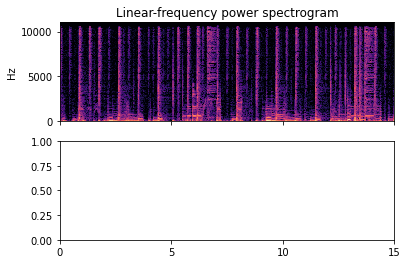

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
y, sr = librosa.load(librosa.ex('choice'), duration=15)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

In [4]:
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

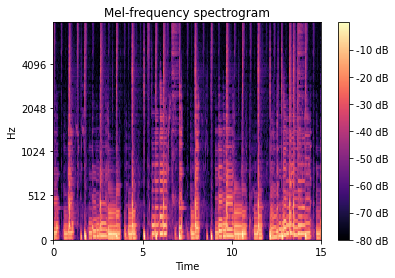

In [5]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [12]:
y, sr = librosa.load(librosa.ex('trumpet'))
S = np.abs(librosa.stft(y))
S



array([[5.3953640e-03, 3.3315693e-03, 1.0328183e-03, ..., 2.2926326e-08,
        9.8623946e-07, 1.2011992e-05],
       [3.2442170e-03, 2.6903967e-03, 1.0622127e-03, ..., 2.4819453e-08,
        9.5359269e-07, 1.2008374e-05],
       [2.3986856e-03, 7.7155454e-04, 1.5704575e-03, ..., 2.5813943e-08,
        9.6956455e-07, 1.1990609e-05],
       ...,
       [7.4183219e-05, 3.6273319e-05, 1.2351239e-06, ..., 3.3514752e-04,
        7.0897001e-04, 8.2297879e-04],
       [7.5229633e-05, 3.7224112e-05, 1.3674936e-06, ..., 2.4655956e-04,
        1.1880830e-04, 1.0312897e-03],
       [7.6400574e-05, 3.9438059e-05, 1.9221090e-06, ..., 1.9005347e-04,
        5.1795773e-04, 1.3460773e-03]], dtype=float32)

In [13]:
S_left = librosa.stft(y, center=False)

In [14]:
D_short = librosa.stft(y, hop_length=64)

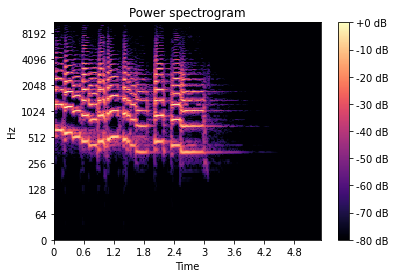

In [15]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [16]:
y, sr = librosa.load(librosa.ex('choice'), duration=10)

In [17]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
tempo

135.99917763157896

In [18]:
beats

array([  3,  21,  40,  59,  78,  96, 116, 135, 154, 173, 192, 211, 230,
       249, 268, 287, 306, 325, 344, 363])

In [19]:
librosa.frames_to_time(beats, sr=sr)

array([0.06965986, 0.48761905, 0.92879819, 1.36997732, 1.81115646,
       2.22911565, 2.69351474, 3.13469388, 3.57587302, 4.01705215,
       4.45823129, 4.89941043, 5.34058957, 5.78176871, 6.22294785,
       6.66412698, 7.10530612, 7.54648526, 7.9876644 , 8.42884354])

In [20]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,
                                       sr=sr)
tempo

135.99917763157896

In [21]:
beats

array([  3,  21,  40,  59,  78,  96, 116, 135, 154, 173, 192, 211, 230,
       249, 268, 287, 306, 325, 344, 363])

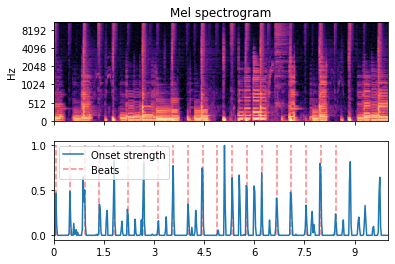

In [22]:
hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[1].legend()

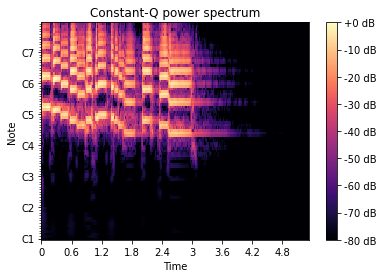

In [23]:
y, sr = librosa.load(librosa.ex('trumpet'))
C = np.abs(librosa.cqt(y, sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [24]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'),
                n_bins=60))
C

array([[8.18437198e-04, 7.60790717e-04, 6.11314725e-04, ...,
        3.66551256e-09, 5.42042811e-09, 6.58064003e-09],
       [6.79436547e-04, 6.11449359e-04, 4.37208684e-04, ...,
        4.37725589e-09, 6.59432775e-09, 8.00584310e-09],
       [6.43747742e-04, 5.68400312e-04, 3.92882182e-04, ...,
        3.95848954e-09, 6.51604415e-09, 8.32781399e-09],
       ...,
       [1.53559062e-03, 3.42491418e-01, 4.87062424e-01, ...,
        2.78645530e-05, 2.84017333e-05, 1.26224895e-05],
       [4.28919680e-02, 4.57983047e-01, 7.89912701e-01, ...,
        8.60426371e-06, 1.52865032e-05, 5.57203248e-06],
       [2.95645068e-03, 1.50762871e-01, 3.72195482e-01, ...,
        2.81716439e-06, 8.96393612e-06, 1.45539761e-05]], dtype=float32)

In [25]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'),
                n_bins=60 * 2, bins_per_octave=12 * 2))
C

array([[6.5008190e-04, 6.3947384e-04, 6.0945452e-04, ..., 4.3533523e-09,
        4.6347366e-09, 4.7924731e-09],
       [5.2099355e-04, 5.0818460e-04, 4.7294027e-04, ..., 4.9883968e-09,
        5.4620686e-09, 5.7308660e-09],
       [4.1783371e-04, 4.0738002e-04, 3.7820410e-04, ..., 5.0428572e-09,
        5.6050649e-09, 5.9295591e-09],
       ...,
       [5.8279421e-02, 2.4601927e-01, 4.9482021e-01, ..., 1.2110740e-05,
        2.3815701e-05, 1.8449357e-05],
       [2.7875714e-03, 1.4240661e-01, 1.0177589e-01, ..., 1.2498517e-05,
        4.2244351e-06, 2.3882651e-05],
       [5.1459163e-02, 6.9584109e-02, 2.8860278e-02, ..., 7.8551648e-06,
        1.6939564e-05, 5.8107785e-06]], dtype=float32)